# SQL-Server, Oracle, MySQL환경에서 모두 실행

## 테이블 생성하기 연습

In [ ]:
# --STUDENT 테이블 생성
Create table STUDENT(
	Sno int not null,
	SName varchar(50) not null,
	Year char(1) not null,
	Dept varchar(50),
	Addr varchar(10),
	Constraint Student_PK PRIMARY KEY(Sno)
);

# --GRADE 테이블 생성
Create table GRADE(
Sno int not null
, Cno char(5) not null
, Cname varchar(50) not null
, Grade char(2) not null
, Score int not null
, Constraint GRADE_PK PRIMARY KEY(Sno, Cno)
, Constraint FK FOREIGN KEY(Sno) REFERENCES STUDENT(Sno)
);


In [ ]:
# --조회하게 되면 빈 테이블이라 컬럼명만 출력이 된다
select * from STUDENT;
select * from GRADE;

In [ ]:
# --행 삽입(STUDENT)
insert into STUDENT
values('2001', '홍길동', '1', '컴퓨터', '서울');
insert into STUDENT
values('2002', '김철수', '1', '토목', '경기');
insert into STUDENT
values('2003', '양성희', '2', '전자', '경기');
insert into STUDENT
values('2004', '최수훈', '2', '디자인', '경기');
insert into STUDENT
values('2005', '송호근', '3', '전자', '서울');


In [ ]:
# --행 삽입(GRADE)
insert into GRADE
values('2001', 'A1000', '자료구조', 'A', '91');
insert into GRADE
values('2002', 'A2000', '데이터베이스', 'A+', '99');
insert into GRADE
values('2003', 'A1000', '자료구조', 'B+', '88');
insert into GRADE
values('2003', 'A2000', '데이터베이스', 'B', '85');
insert into GRADE
values('2004', 'A2000', '데이터베이스', 'A', '94');
insert into GRADE
values('2004', 'A3000', '운영체제', 'B+', '89');
insert into GRADE
values('2005', 'A3000', '운영체제', 'B', '88');

In [ ]:
# --다시 조회
select * from STUDENT;
select * from GRADE;

### 1. SQL-Server의 경우

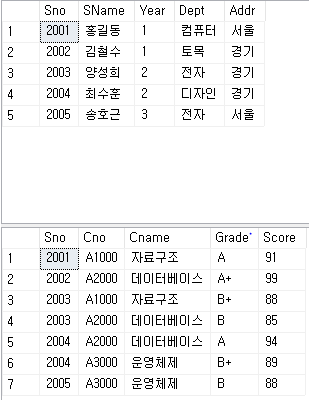

### 2. Oracle의 경우

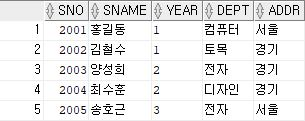

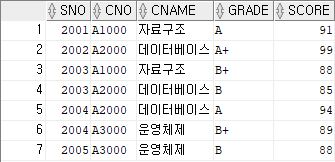

### 3. MySQL의 경우

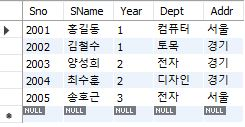

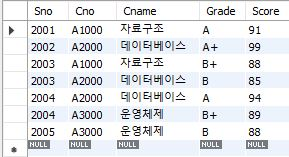

* 레이아웃의 형태가 다를뿐 표준 SQL구문이라 결과의 형태는 동일하다.

아래의 코드 실행은 SQL-Server에서 진행하였다.

In [ ]:
# --갱신
update STUDENT
set Dept = '데이터엔지니어링'
where Sno = '2004'


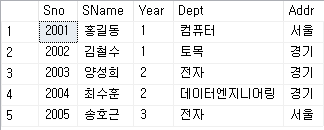

In [ ]:
# --행 삭제
delete from GRADE where Sno = '2004'

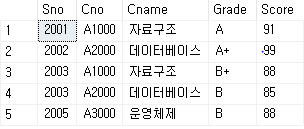

In [ ]:
# --테이블 삭제
drop table GRADE;
drop table STUDENT;

In [ ]:
# --inner join: 테이블 간 컬럼값들이 정확하게 일치하는 경우 사용
# --방법1
select STUDENT.Sno, GRADE.Cno, GRADE.Cname
from STUDENT, GRADE
where STUDENT.Sno = GRADE.Sno;

# --방법2
select STUDENT.Sno, GRADE.Cno, GRADE.Cname
from STUDENT inner join GRADE
on STUDENT.Sno = GRADE.Sno;

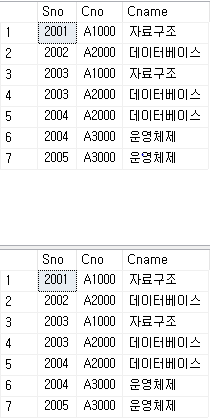

In [ ]:
# --3개 이상의 테이블 조인
# --새로운 테이블 XXX 생성
create table XXX(
	Cno char(5) not null,
	xxx varchar(50) not null,
	Constraint XXX_PK PRIMARY KEY(Cno)
);

insert into XXX
values('A1000', 'XX1')
insert into XXX
values('A2000', 'XX2')

select * from XXX;

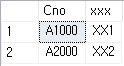

In [ ]:
# --3개 이상의 테이블 조인
select * from STUDENT, GRADE, XXX
where STUDENT.Sno = GRADE.Sno and GRADE.Cno = XXX.Cno;

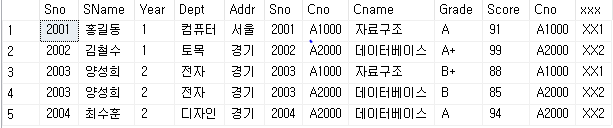

In [ ]:
# --outer join
ALTER TABLE Grade
DROP CONSTRAINT FK;

insert into STUDENT
values('2000', '허민수', '1', '컴퓨터', '서울');
insert into STUDENT
values('2007', '이근수', '1', '토목', '경기');

insert into GRADE
values('2008', 'A1000', '자료구조', 'A', '93');
insert into GRADE
values('2009', 'A2000', '데이터베이스', 'A', '94');

In [ ]:
# --left outer join
select STUDENT.Sno, GRADE.Cno, GRADE.Cname
from STUDENT left outer join GRADE
on STUDENT.Sno = GRADE.Sno;

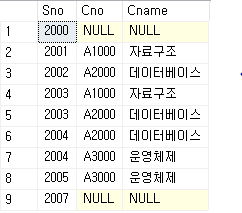

In [ ]:
# --right outer join
select STUDENT.Sno, GRADE.Cno, GRADE.Cname
from STUDENT right outer join GRADE
on STUDENT.Sno = GRADE.Sno;

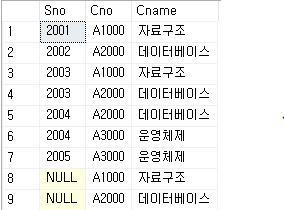

In [ ]:
# --full outer join
select STUDENT.Sno, GRADE.Cno, GRADE.Cname
from STUDENT full outer join GRADE
on STUDENT.Sno = GRADE.Sno;

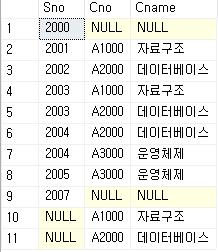

In [ ]:
# --서브 쿼리
select S.Sno, G.Sno, G.Cname
from (select GRADE.Sno, GRADE.Cno, GRADE.Cname from GRADE where Cname = '자료구조')G, STUDENT S
where S.Sno = G.Sno;

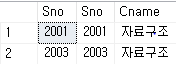

In [ ]:
# --위의 식을 간단하게 작성하면 다음과 같다
select S.Sno, G.Sno, G.Cname
from STUDENT S, GRADE G
where S.Sno = G.Sno;

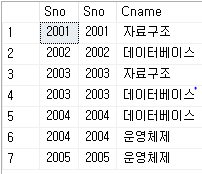

## 테이블 만들기 실습

In [ ]:
# --1. 테이블 생성, 행 추가
Create table Service_tb (
    Service_CD char(5) not null,
    Service_IDX varchar(50) not null,
    Constraint Service_tb_PK PRIMARY KEY (Service_CD),
);

Create table Customer_tb(
	Cust_ID char(4) not null,
	Service_CD char(5) not null,
	Region varchar(10) not null,
	Constraint Customer_PK PRIMARY KEY(Cust_ID, Service_CD),
	Constraint FK FOREIGN KEY(Service_CD) REFERENCES Service_tb(Service_CD)
);

insert into Service_tb
values('A0001', '고객상담');
insert into Service_tb
values('A0002', '기술지원');
insert into Service_tb
values('A0003', '장애처리');


insert into Customer_tb
values('U211', 'A0001', '서울');
insert into Customer_tb
values('U314', 'A0001', '경기');
insert into Customer_tb
values('U416', 'A0002', '경기');
insert into Customer_tb
values('U533', 'A0003', '서울');

select * from Customer_tb;
select * from Service_tb;


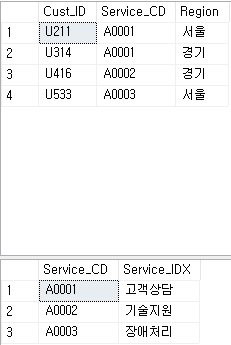

In [ ]:
# --2. 고객-서비스 테이블의 u211고객의 서비스 지역을 '대전'으로 수정
update Customer_tb
set Region = '대전'
where CUST_ID = 'U211'

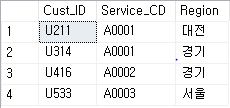

In [ ]:
# --3. 고객-서비스 테이블에 [U577, A001, 인천] 행 추가
ALTER TABLE Customer_tb
DROP CONSTRAINT FK;

insert into Customer_tb
values('U577', 'A001', '인천');

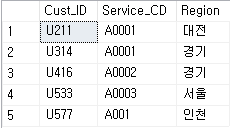

In [ ]:
# --4. 고객번호가 U314인 고객의 정보를 삭제하시오
delete from Customer_tb where CUST_ID = 'U314'

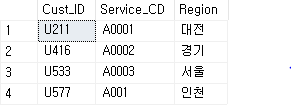


## 교량데이터로 테이블 생성하기

In [ ]:
# --교량명 테이블 생성
Create table BRIDGE_NM(
	Bridge_id char(4) not null,
	Bridge_nm varchar(50) not null,
	Constraint BRIDGE_NM_PK PRIMARY KEY(Bridge_id)
);

# --교량위치코드 테이블 생성
Create table BRIDGE_PL(
	Bridge_pl char(5) not null,
	sido varchar(10) not null,
	sgg varchar(10) not null,
	Constraint BRIDGE_PL_PK PRIMARY KEY(Bridge_pl)
);

# --담당자 테이블 생성
Create table WORKER(
	Worker_id char(5) not null,
	Worker_nm varchar(10) not null,
	Worker_idx char(4) not null,
	Constraint WORKER_PK PRIMARY KEY(Worker_id)
);


# --점검이력 테이블 생성
Create table CHECK_tb(
	Check_time date not null,
	Bridge_id char(4) not null,
	Worker_id char(5) not null,
	Safe_grade char(1) not null,
	faulty varchar(50),
	Constraint CHECK_tb_PK PRIMARY KEY(Check_time, Bridge_id),
	--Constraint FK FOREIGN KEY(Worker_id) REFERENCES WORKER(Worker_id)
);

# --교량 테이블 생성
Create table BRIDGE(
	Bridge_id char(4) not null,
	Bridge_pl char(5) not null,
	Passed_year int not null,
	Check_time date not null,
	Safe_grade char(1) not null,
	Constraint BRIDGE_PK PRIMARY KEY(Bridge_id),
	Constraint FK FOREIGN KEY(Bridge_pl) REFERENCES BRIDGE_PL(Bridge_pl)
);

select * from BRIDGE_NM
select * from BRIDGE_PL
select * from WORKER
select * from CHECK_tb
select * from BRIDGE

In [ ]:
# --교량명 테이블에 행 추가
insert into BRIDGE_NM
values ('S001', '홍제교');
insert into BRIDGE_NM
values ('K001', '연무교');
insert into BRIDGE_NM
values ('S002', '올림픽대교');
insert into BRIDGE_NM
values ('K002', '진위교');
insert into BRIDGE_NM
values ('S003', '석천교');

# --교량위치 테이블에 행 추가
insert into BRIDGE_PL
values (11100, '서울', '서대문구');
insert into BRIDGE_PL
values (41000, '경기도', '성남시');
insert into BRIDGE_PL
values (11105, '서울', '광진구');
insert into BRIDGE_PL
values (41001, '경기도', '평택시');
insert into BRIDGE_PL
values (11103, '서울', '영등포구');

# --담당자 테이블에 행 추가
insert into WORKER
values ('DS001', '김민지', 'B001');
insert into WORKER
values ('DK002', '김멀티', 'B002');
insert into WORKER
values ('DS003', '김세종', 'B001');

# --점검이력 테이블에 행 추가
insert into CHECK_tb
values ('2018-12-31', 'K002', 'DK002','B', NULL);
insert into CHECK_tb
values ('2018-12-31', 'S001', 'DS003','A', NULL);
insert into CHECK_tb
values ('2019-12-27', 'K001', 'DK002','D', '콘크리트 균열');
insert into CHECK_tb
values ('2021-05-31', 'S002', 'DS001','B', '기둥 스크래치');
insert into CHECK_tb
values ('2021-11-16', 'S001', 'DS001','C', '볼트 깨짐');

# --교량 테이블에 행 추가
insert into BRIDGE
values ('S001', 11100, 43, '2021-11-16', 'C');
insert into BRIDGE
values ('K001', 41000, 33, '2021-11-16', 'D');
insert into BRIDGE
values ('S002', 41000, 33, '2021-11-16', 'B');
insert into BRIDGE
values ('K002', 41000, 37, '2021-11-16', 'B');
insert into BRIDGE
values ('S003', 11100, 16, '2021-11-16', 'A');


select * from BRIDGE_NM
select * from BRIDGE_PL
select * from WORKER
select * from CHECK_tb
select * from BRIDGE


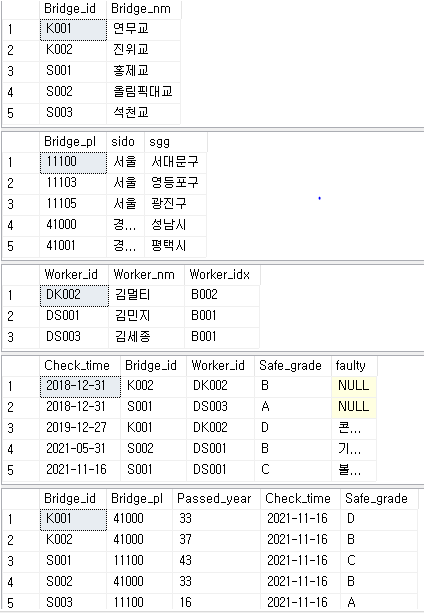